# Завантаження датасету **Iris**

In [4]:
from sklearn.datasets import load_iris

# Завантажуємо як pandas DataFrame + Series
iris_db = load_iris(as_frame=True)

# iris_db.frame містить ознаки та ціль у одному DataFrame
df = iris_db.frame

# Виведення базових характеристик

In [5]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Стандартизація даних

In [6]:
from sklearn.preprocessing import StandardScaler

# Стандартизація лише числових ознак, без цілі
num_cols = df.select_dtypes(include='number').columns.drop('target', errors='ignore')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Візуалізуалізація розподілення спостережень за класами
## Візуалізація по всім класам

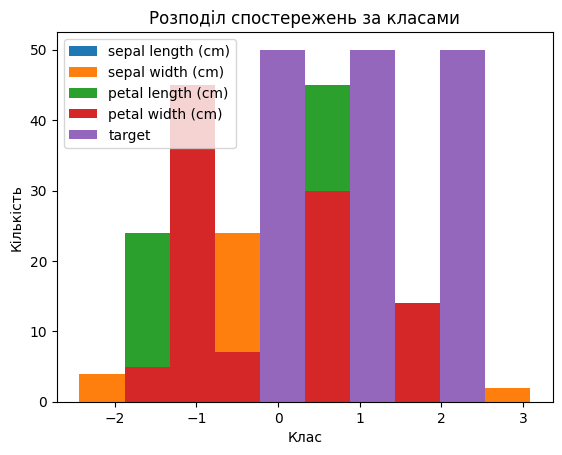

In [7]:
import matplotlib.pyplot as plt
df_numerical = df.select_dtypes(include='number')
df_numerical.plot(kind="hist")
plt.xlabel("Клас")
plt.ylabel("Кількість")
plt.title("Розподіл спостережень за класами")
plt.show()

## Візуалізація розподілу по кожному з класів спостереження

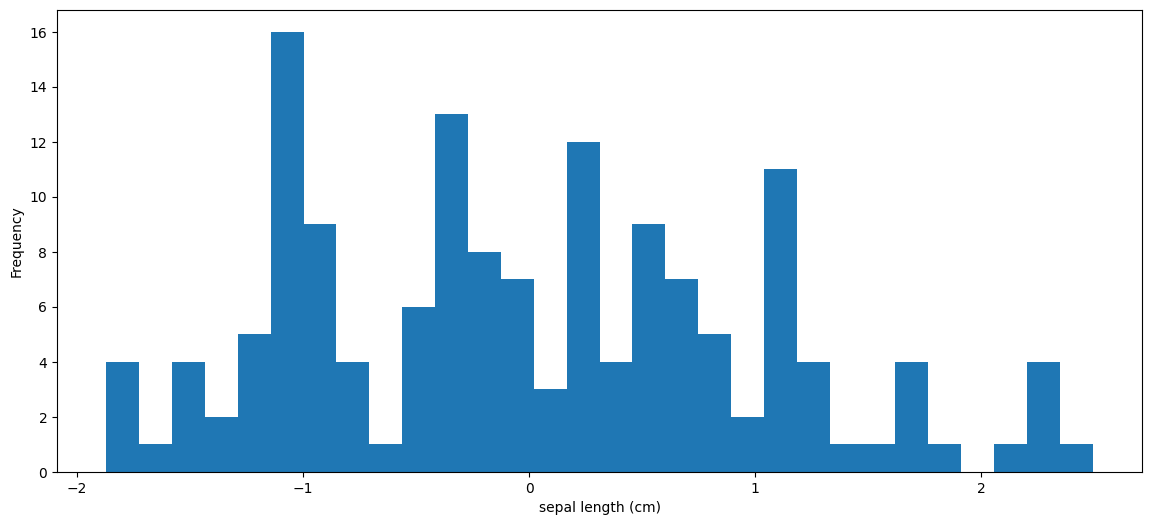

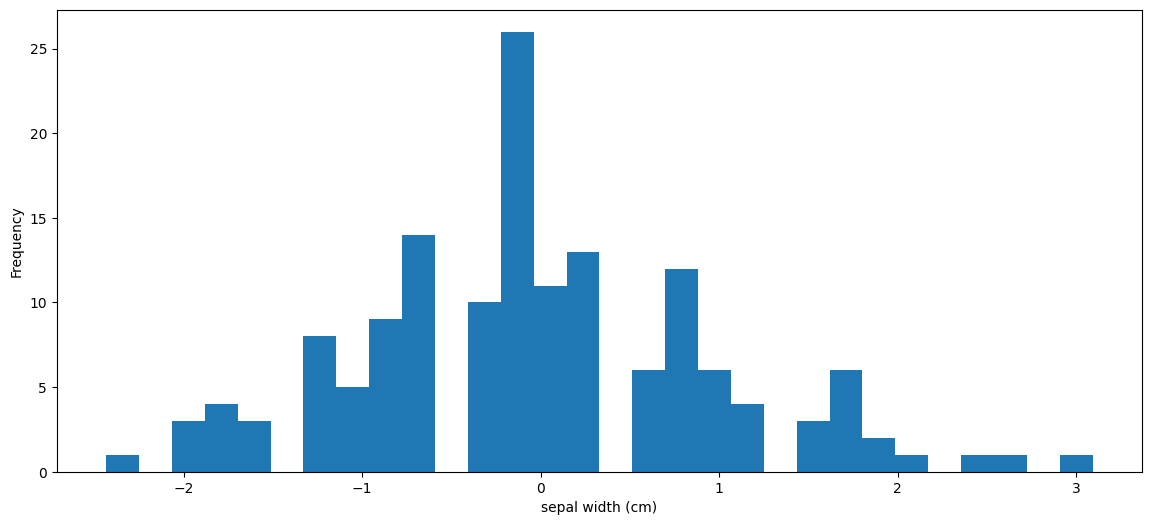

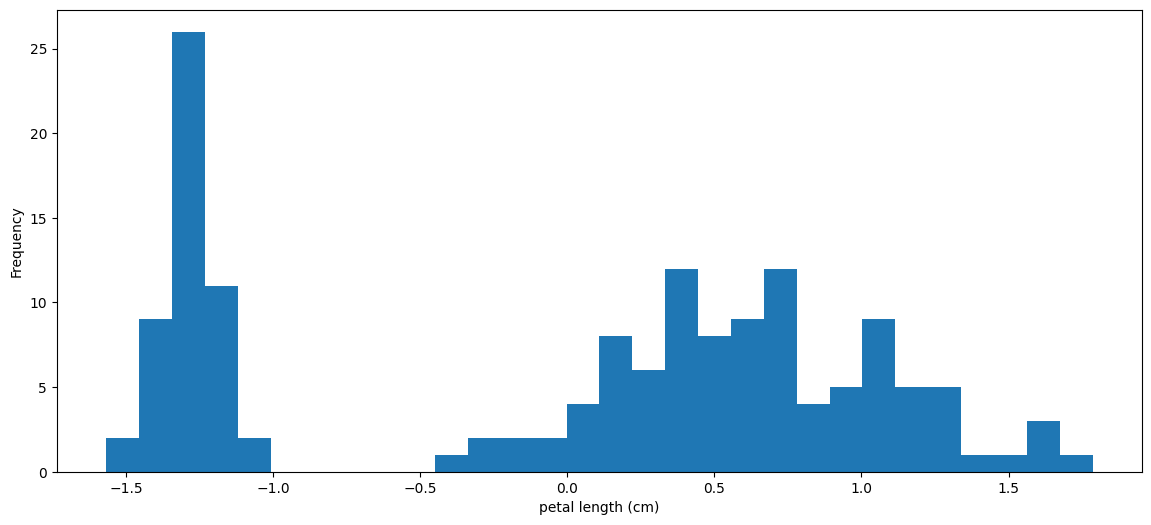

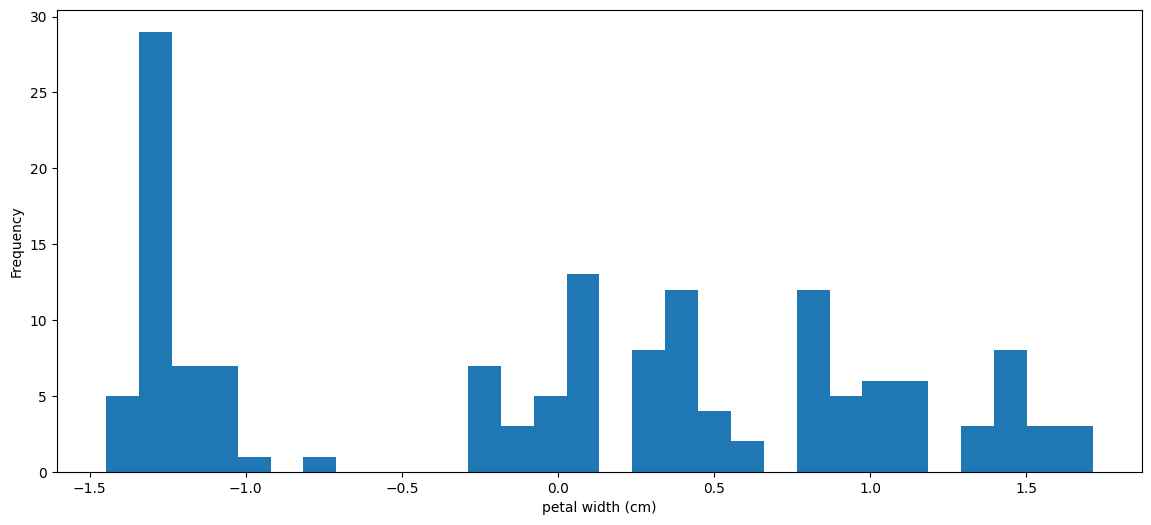

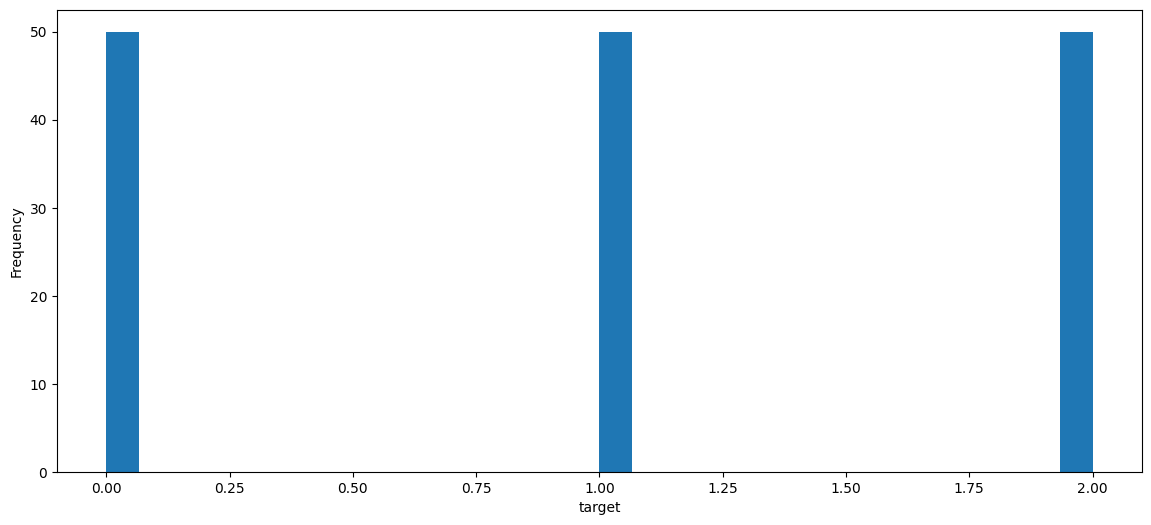

In [8]:
for num_field in df_numerical:

    plot = df[num_field].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )
    plot.set_xlabel(num_field)
    plt.show(plot)

## Візуалізуємо кореляції по класам спостереження

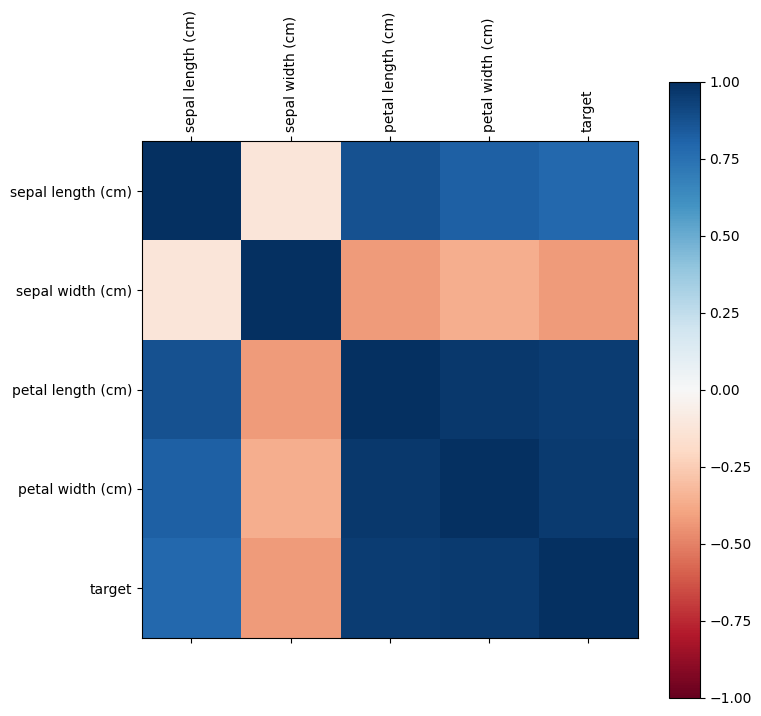

In [9]:
corr = df.select_dtypes(include="number").corr(method='pearson')

fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=False)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

# Проводимо спектральну кластеризацію

In [10]:
from sklearn import preprocessing

df = preprocessing.normalize(df)

In [11]:
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering
# Дані "дві окружності"
X, y_true = make_circles(n_samples=500, factor=0.4, noise=0.06, random_state=42)

# Спектральна кластеризація
sc = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='kmeans',
    random_state=42
)

labels = sc.fit_predict(X)

/Users/kozak_mamay/PycharmProjects/WoolfDataScience/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, labels)
cm

array([[  0, 250],
       [250,   0]])

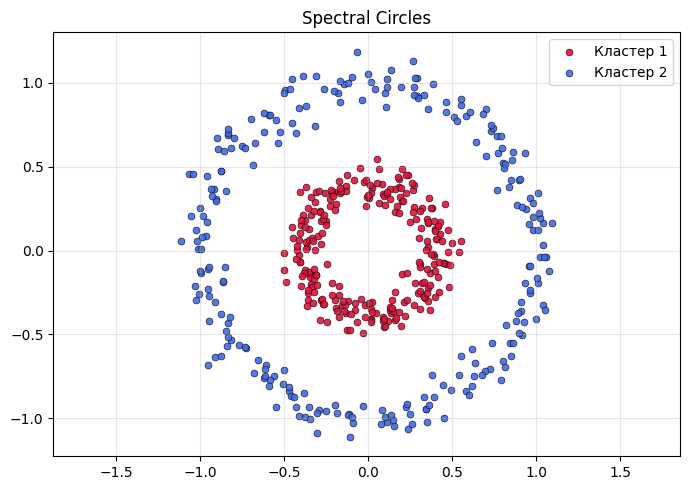

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Візуалізація кластерів з легендою
plt.figure(figsize=(7, 5))
palette = np.array(['crimson', 'royalblue'])
mask0 = labels == 0
mask1 = labels == 1
plt.scatter(X[mask0, 0], X[mask0, 1], c=palette[0], s=25, edgecolors='k', linewidths=0.4, alpha=0.9, label='Кластер 1')
plt.scatter(X[mask1, 0], X[mask1, 1], c=palette[1], s=25, edgecolors='k', linewidths=0.4, alpha=0.9, label='Кластер 2')
plt.title("Spectral Circles")
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', frameon=True)
plt.tight_layout()
plt.show()

